In [2]:
import numpy as np
import scipy.io

def load_and_vectorize_data(train_file, test_file):
    """
    Loading the training and testing dataset stored as .mat files and then vectorizing them.
    """
    train_data = scipy.io.loadmat(train_file)
    X_train = train_data['x']
    y_train = train_data['y'].flatten()

    print(f"Original Training Data Shape: {X_train.shape}")
    
    test_data = scipy.io.loadmat(test_file)
    X_test = test_data['x']
    y_test = test_data['y'].flatten()

    n_train_samples = X_train.shape[0]
    n_test_samples = X_test.shape[0]

    print(f"Original Testing Data Shape: {X_test.shape}")

    # Vectorize the images by concatenating columns
    X_train_vectorized = X_train.reshape(n_train_samples, -1, order='F')
    X_test_vectorized = X_test.reshape(n_test_samples, -1, order='F')


    print("\nOriginal Vectorized Training Data for the first 2 sample datapoints:")
    print(X_train_vectorized[:2])
    print("\nOriginal Vectorized Testing Data for the first 2 sample datapoints:")
    print(X_test_vectorized[:2])
    return X_train_vectorized, y_train, X_test_vectorized, y_test

# Usage
X_train_vectorized, y_train, X_test_vectorized, y_test = load_and_vectorize_data('train_data.mat', 'test_data.mat')




Original Training Data Shape: (12000, 28, 28)
Original Testing Data Shape: (2000, 28, 28)

Original Vectorized Training Data for the first 2 sample datapoints:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Original Vectorized Testing Data for the first 2 sample datapoints:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
def normalize_data(X_train, X_test):
    """
    Calculating the mean and standard deviation for each point in the matrix and then normalizing.
    """
    calc_mean = np.mean(X_train, axis=0)
    calc_std_dev = np.std(X_train, axis=0)

    X_train_normalized = (X_train - calc_mean) / calc_std_dev
    X_test_normalized = (X_test - calc_mean) / calc_std_dev

    return X_train_normalized, X_test_normalized, calc_mean, calc_std_dev

# Usage for Task 1
X_train_vectorized, y_train, X_test_vectorized, y_test = load_and_vectorize_data('train_data.mat', 'test_data.mat')
X_train_normalized, X_test_normalized, mean, std_dev = normalize_data(X_train_vectorized, X_test_vectorized)

# Print dimensions after normalization
print(f"\nNormalized Training Data Shape: {X_train_normalized.shape}")
print(f"\nNormalized Testing Data Shape: {X_test_normalized.shape}")

Original Training Data Shape: (12000, 28, 28)
Original Testing Data Shape: (2000, 28, 28)

Original Vectorized Training Data for the first 2 sample datapoints:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Original Vectorized Testing Data for the first 2 sample datapoints:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Normalized Training Data Shape: (12000, 784)

Normalized Testing Data Shape: (2000, 784)


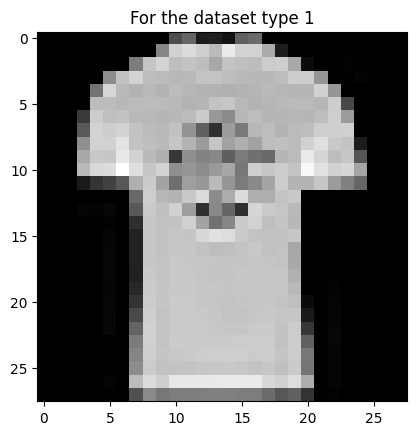

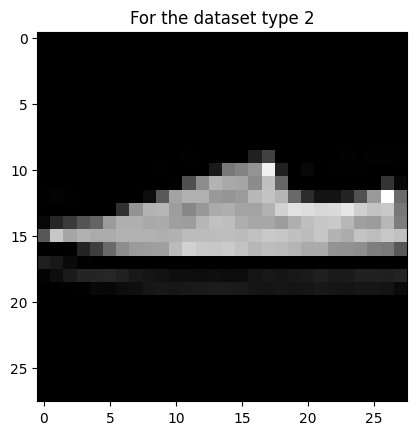

In [4]:
import matplotlib.pyplot as plt

def visualize_images(X, num_images=2):
    """
    Visualizing the tshirts and sneakers by displaying them as 28x28 vectors
    """
    for i in range(num_images):
        disp_both_img = X[i].reshape(28, 28, order='F')
        plt.imshow(disp_both_img, cmap='gray')
        plt.title(f"For the dataset type {i+1}")
        plt.show()

# Visualize the first 2 images in the training set
visualize_images(X_train_vectorized)


In [5]:
def compute_pca(X, n_components=2):
    """
    Performing a manual pca by creating a correlation matrix and finding the eigenvectors.
    """
    # Compute covariance matrix
    cov_matrix = np.cov(X, rowvar=False)

    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components
    pca_components = sorted_eigenvectors[:, :n_components]

    return pca_components

# Usage for Task 2
pca_components = compute_pca(X_train_normalized, n_components=2)

# Print PCA components
print(f"\nFirst Principal Component:\n {pca_components[:, 0][:10]}")
print(f"\nSecond Principal Component:\n {pca_components[:, 1][:10]}")



First Principal Component:
 [0.00066446 0.0005431  0.00134104 0.0011775  0.00108253 0.00101472
 0.00155424 0.00184846 0.00175306 0.0016938 ]

Second Principal Component:
 [-0.0002653  -0.00159128 -0.00300019 -0.00296736 -0.0020361  -0.00060336
 -0.00254043 -0.00297058 -0.00264094 -0.00347357]


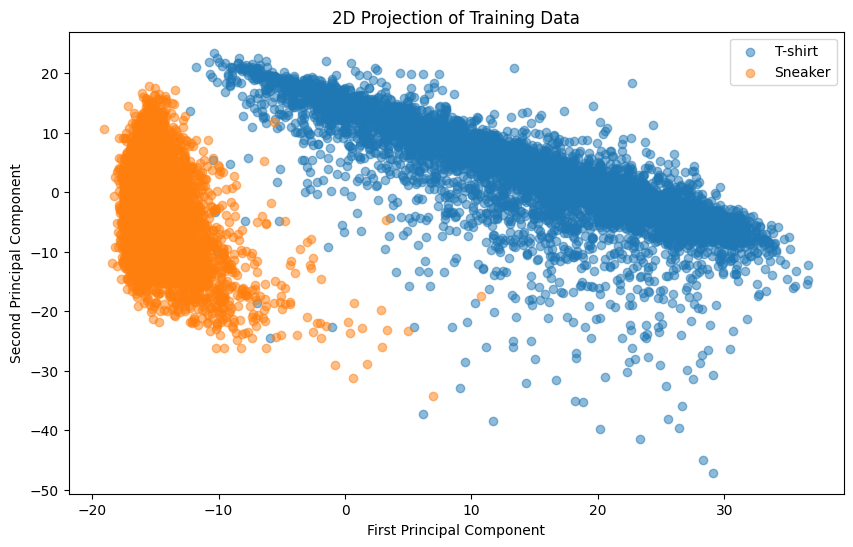

In [6]:
import matplotlib.pyplot as plt

def project_to_2d(X, pca_components):
    """
    Project the data into 2d
    """
    X_pca = X @ pca_components
    return X_pca

def plot_2d_projection(X_pca, y, title):
    """
    Plot the 2D projections of the samples.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='T-shirt', alpha=0.5)
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Sneaker', alpha=0.5)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.legend()
    plt.show()

# Usage for Task 3
X_train_pca = project_to_2d(X_train_normalized, pca_components)
X_test_pca = project_to_2d(X_test_normalized, pca_components)

# Plot the 2D projection of the training set
plot_2d_projection(X_train_pca, y_train, '2D Projection of Training Data')


In [7]:
from scipy.stats import multivariate_normal

def estimate_gaussian_params(X, y):
   
    X_tshirt = X[y == 0]
    X_sneaker = X[y == 1]

    mean_for_tshirt = np.mean(X_tshirt, axis=0)
    cov_for_tshirt = np.cov(X_tshirt, rowvar=False)
    mean_for_sneaker = np.mean(X_sneaker, axis=0)
    cov_for_sneaker = np.cov(X_sneaker, rowvar=False)

    dist_tshirt = multivariate_normal(mean=mean_for_tshirt, cov=cov_for_tshirt)
    dist_sneaker = multivariate_normal(mean=mean_for_sneaker, cov=cov_for_sneaker)

    return dist_tshirt, dist_sneaker

# Usage for Task 4
dist_tshirt, dist_sneaker = estimate_gaussian_params(X_train_pca, y_train)

# Print estimated Gaussian parameters
print(f"\nMean Vector for Tshirts:\n {dist_tshirt.mean}")
print(f"\nCovariance Matrix for Tshirts:\n {dist_tshirt.cov}")
print(f"\nMean Vector for sneaker:\n {dist_sneaker.mean}")
print(f"\nCovariance Matrix for sneaker:\n {dist_sneaker.cov}")



Mean Vector for Tshirts:
 [14.96013579  2.53759713]

Covariance Matrix for Tshirts:
 [[103.38209995 -69.15661464]
 [-69.15661464  73.43418283]]

Mean Vector for sneaker:
 [-14.96013579  -2.53759713]

Covariance Matrix for sneaker:
 [[ 4.94656978 -6.78163691]
 [-6.78163691 54.67473161]]


In [8]:
def bayesian_classifier(x, dist_tshirt, dist_sneaker):
    """
    Classify the tshirt and sneaker using Bayesian decision theory using the Gaussian distributions.
    """
    chances_of_tshirt = dist_tshirt.pdf(x)
    chances_of_sneaker = dist_sneaker.pdf(x)
    return 0 if chances_of_tshirt > chances_of_sneaker else 1

def classify_and_evaluate(X_pca, y_true, dist_tshirt, dist_sneaker):
    """
    Classify the data using Bayesian decision theory and compute accuracy.
    """
    y_pred = np.array([bayesian_classifier(x, dist_tshirt, dist_sneaker) for x in X_pca])
    accuracy = np.mean(y_true == y_pred)
    return accuracy


train_dat_accuracy = classify_and_evaluate(X_train_pca, y_train, dist_tshirt, dist_sneaker)
test_dat_accuracy = classify_and_evaluate(X_test_pca, y_test, dist_tshirt, dist_sneaker)

print(f"Training dataset accuracy: {train_dat_accuracy * 100:.2f}%")
print(f"Testing dataset accuracy: {test_dat_accuracy * 100:.2f}%")


Training dataset accuracy: 99.75%
Testing dataset accuracy: 99.90%


In [9]:
from sklearn.model_selection import KFold
from scipy.stats import multivariate_normal
import numpy as np

def perform_cross_validation(X, y, n_splits=5):
    """
    Perform k-fold cross-validation to evaluate model accuracy.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Cross-validation loop
    for train_index, val_index in kf.split(X):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        
        # Normalize the training and validation sets using the training fold mean and std
        mean_fold = np.mean(X_train_fold, axis=0)
        std_dev_fold = np.std(X_train_fold, axis=0)
        X_train_fold_norm = (X_train_fold - mean_fold) / std_dev_fold
        X_val_fold_norm = (X_val_fold - mean_fold) / std_dev_fold
        
        # Apply PCA on the training fold
        pca_components = compute_pca(X_train_fold_norm, n_components=2)
        
        # Project the data onto the principal components
        X_train_fold_pca = X_train_fold_norm @ pca_components
        X_val_fold_pca = X_val_fold_norm @ pca_components

        # Estimate Gaussian parameters for each class using the training fold
        dist_tshirt, dist_sneaker = estimate_gaussian_params(X_train_fold_pca, y_train_fold)

        # Evaluate accuracy on the validation fold
        val_accuracy = classify_and_evaluate(X_val_fold_pca, y_val_fold, dist_tshirt, dist_sneaker)
        accuracies.append(val_accuracy)

        print(f"Validation Accuracy for current fold: {val_accuracy * 100:.2f}%")

    # Compute the average accuracy across all folds
    avg_accuracy = np.mean(accuracies)
    print(f"\nAverage Cross-Validation Accuracy: {avg_accuracy * 100:.2f}%")

# Usage for Cross-Validation
perform_cross_validation(X_train_vectorized, y_train, n_splits=5)


Validation Accuracy for current fold: 99.83%
Validation Accuracy for current fold: 99.50%
Validation Accuracy for current fold: 99.71%
Validation Accuracy for current fold: 99.71%
Validation Accuracy for current fold: 99.96%

Average Cross-Validation Accuracy: 99.74%


In [2]:
"""
Owner

Rushi Vasantkumar Parikh
1233832251

"""

'\nOwner\n\nRushi Vasantkumar Parikh\n1233832251\n\n'

Visualization saved as cifar10_sample.png


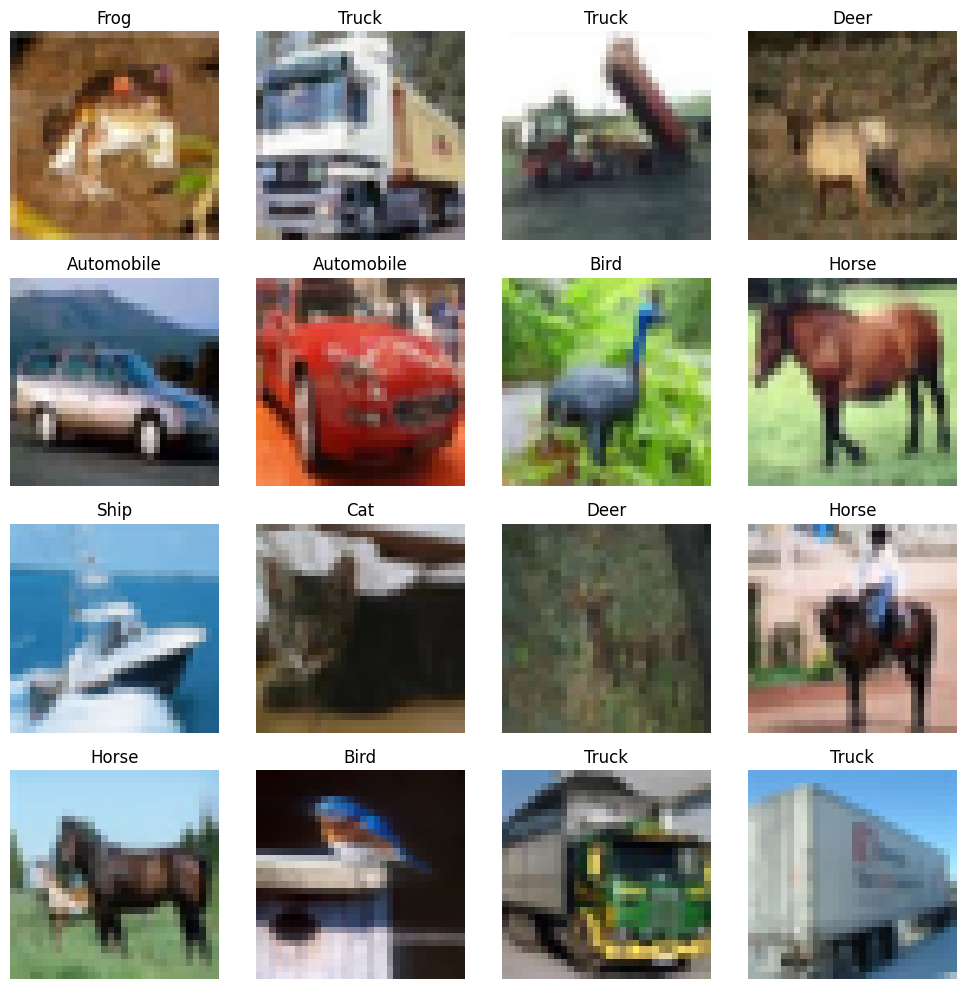

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Function to plot and save CIFAR-10 images
def save_cifar10_visualization(images, labels, class_names, num_images=16, filename="cifar10_sample.png"):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)  # Display in a 4x4 grid
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename)
    print(f"Visualization saved as {filename}")

# Save the visualization
save_cifar10_visualization(x_train, y_train, class_names, num_images=16, filename="cifar10_sample.png")


In [9]:
import numpy as np
import scipy.io as sio


# Define activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return -(y_true - y_pred)

# Initialize parameters
def initialize_parameters(input_size, nH, output_size):
    return {
        "W1": np.random.randn(input_size, nH) * 0.01,
        "b1": np.zeros((1, nH)),
        "W2": np.random.randn(nH, output_size) * 0.01,
        "b2": np.zeros((1, output_size)),
    }

# Forward propagation
def forward_propagation(X, parameters):
    Z1 = np.dot(X, parameters["W1"]) + parameters["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters["W2"]) + parameters["b2"]
    return Z2, {"A1": A1, "Z1": Z1, "Z2": Z2}

# Backward propagation
def backward_propagation(X, Y, cache, parameters):
    m = X.shape[0]
    A1 = cache["A1"]

    dZ2 = mse_loss_derivative(Y, cache["Z2"]) / m
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, parameters["W2"].T)
    dZ1 = dA1 * relu_derivative(cache["Z1"])
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(parameters, gradients, learning_rate, momentum=None, prev_gradients=None):
    if momentum:
        # Initialize prev_gradients if not already initialized
        if prev_gradients is None:
            prev_gradients = {key: np.zeros_like(value) for key, value in gradients.items()}
        
        for key in gradients.keys():
            # Update gradients with momentum
            prev_gradients[key] = momentum * prev_gradients[key] + (1 - momentum) * gradients[key]
            parameter_key = key[1:]  # Remove "d" prefix to match parameter keys
            parameters[parameter_key] -= learning_rate * prev_gradients[key]
    else:
        for key in gradients.keys():
            parameter_key = key[1:]  # Remove "d" prefix to match parameter keys
            parameters[parameter_key] -= learning_rate * gradients[key]
    return parameters

# Training function
def train_mlp(X_train, Y_train, nH, epochs, learning_rate, batch_size, momentum=None):
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]
    parameters = initialize_parameters(input_size, nH, output_size)
    prev_gradients = None

    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i + batch_size]
            Y_batch = Y_train[i:i + batch_size]
            Y_pred, cache = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(X_batch, Y_batch, cache, parameters)
            parameters = update_parameters(parameters, gradients, learning_rate, momentum, prev_gradients)
            if momentum:
                prev_gradients = {key: gradients[key].copy() for key in gradients}

        if epoch % 10 == 0 or epoch == epochs - 1:
            train_loss = mse_loss(Y_train, forward_propagation(X_train, parameters)[0])
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss:.4f}")

    return parameters

# Test function
def test_mlp(X_test, parameters):
    Y_pred, _ = forward_propagation(X_test, parameters)
    return Y_pred

# Example usage
if __name__ == "__main__":
    train_class0 = sio.loadmat('train_class0.mat')['x']
    train_class1 = sio.loadmat('train_class1.mat')['x']
    test_class0 = sio.loadmat('test_class0.mat')['x']
    test_class1 = sio.loadmat('test_class1.mat')['x']

    X_train = np.vstack((train_class0[:1500], train_class1[:1500]))
    Y_train = np.vstack((np.zeros((1500, 1)), np.ones((1500, 1))))
    X_val = np.vstack((train_class0[1500:], train_class1[1500:]))
    Y_val = np.vstack((np.zeros((500, 1)), np.ones((500, 1))))
    X_test = np.vstack((test_class0, test_class1))
    Y_test = np.vstack((np.zeros((1000, 1)), np.ones((1000, 1))))

    nH = 6  # Number of hidden nodes
    epochs = 100
    learning_rate = 0.01
    batch_size = 32
    momentum = 0.9

# Train the MLP
    parameters = train_mlp(X_train, Y_train, nH, epochs, learning_rate, batch_size, momentum)
    predictions = test_mlp(X_test, parameters)

    test_loss = mse_loss(Y_test, predictions)
    print(f"Test Loss: {test_loss:.4f}")


Epoch 1/100, Loss: 0.2635
Epoch 11/100, Loss: 0.2467
Epoch 21/100, Loss: 0.2288
Epoch 31/100, Loss: 0.2285
Epoch 41/100, Loss: 0.2287
Epoch 51/100, Loss: 0.2287
Epoch 61/100, Loss: 0.2287
Epoch 71/100, Loss: 0.2290
Epoch 81/100, Loss: 0.2295
Epoch 91/100, Loss: 0.2292
Epoch 100/100, Loss: 0.2252
Test Loss: 0.2242



Training with nH = 2
the number of Epochs are 1/200, Validation Loss is: 0.2651
the number of Epochs are 11/200, Validation Loss is: 0.2636
the number of Epochs are 21/200, Validation Loss is: 0.2631
the number of Epochs are 31/200, Validation Loss is: 0.2598
the number of Epochs are 41/200, Validation Loss is: 0.2490
the number of Epochs are 51/200, Validation Loss is: 0.2362
the number of Epochs are 61/200, Validation Loss is: 0.2262
the number of Epochs are 71/200, Validation Loss is: 0.2203
the number of Epochs are 81/200, Validation Loss is: 0.2176
the number of Epochs are 91/200, Validation Loss is: 0.2165
the number of Epochs are 101/200, Validation Loss is: 0.2163
the number of Epochs are 111/200, Validation Loss is: 0.2165
the number of Epochs are 121/200, Validation Loss is: 0.2167
the number of Epochs are 131/200, Validation Loss is: 0.2170
the number of Epochs are 141/200, Validation Loss is: 0.2171
the number of Epochs are 151/200, Validation Loss is: 0.2171
the number of

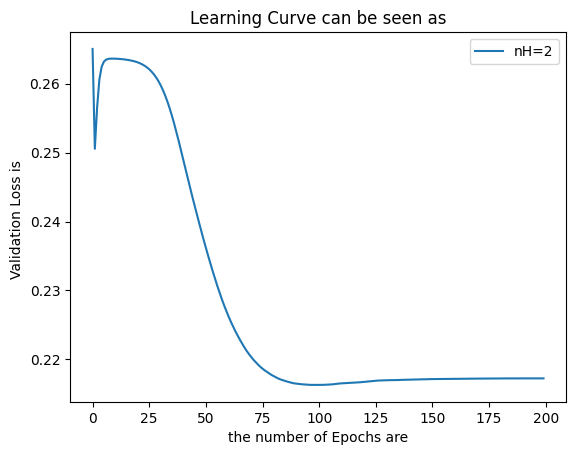


Training with nH = 4
the number of Epochs are 1/200, Validation Loss is: 0.2650
the number of Epochs are 11/200, Validation Loss is: 0.2636
the number of Epochs are 21/200, Validation Loss is: 0.2631
the number of Epochs are 31/200, Validation Loss is: 0.2596
the number of Epochs are 41/200, Validation Loss is: 0.2463
the number of Epochs are 51/200, Validation Loss is: 0.2313
the number of Epochs are 61/200, Validation Loss is: 0.2239
the number of Epochs are 71/200, Validation Loss is: 0.2204
the number of Epochs are 81/200, Validation Loss is: 0.2189
the number of Epochs are 91/200, Validation Loss is: 0.2182
the number of Epochs are 101/200, Validation Loss is: 0.2180
the number of Epochs are 111/200, Validation Loss is: 0.2181
the number of Epochs are 121/200, Validation Loss is: 0.2184
the number of Epochs are 131/200, Validation Loss is: 0.2188
the number of Epochs are 141/200, Validation Loss is: 0.2192
the number of Epochs are 151/200, Validation Loss is: 0.2196
the number of

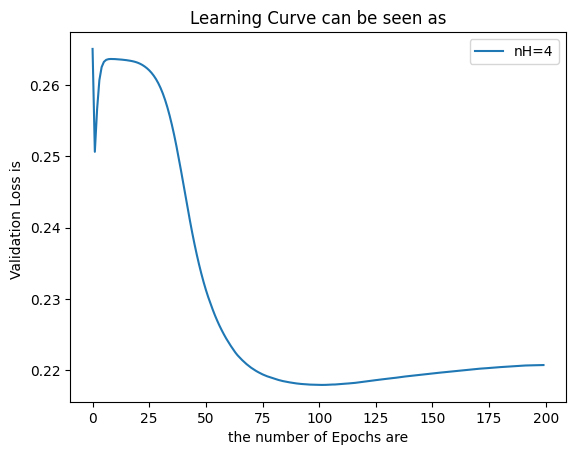


Training with nH = 6
the number of Epochs are 1/200, Validation Loss is: 0.2650
the number of Epochs are 11/200, Validation Loss is: 0.2629
the number of Epochs are 21/200, Validation Loss is: 0.2579
the number of Epochs are 31/200, Validation Loss is: 0.2424
the number of Epochs are 41/200, Validation Loss is: 0.2291
the number of Epochs are 51/200, Validation Loss is: 0.2233
the number of Epochs are 61/200, Validation Loss is: 0.2207
the number of Epochs are 71/200, Validation Loss is: 0.2190
the number of Epochs are 81/200, Validation Loss is: 0.2171
the number of Epochs are 91/200, Validation Loss is: 0.2153
the number of Epochs are 101/200, Validation Loss is: 0.2137
the number of Epochs are 111/200, Validation Loss is: 0.2124
the number of Epochs are 121/200, Validation Loss is: 0.2114
the number of Epochs are 131/200, Validation Loss is: 0.2105
the number of Epochs are 141/200, Validation Loss is: 0.2095
the number of Epochs are 151/200, Validation Loss is: 0.2087
the number of

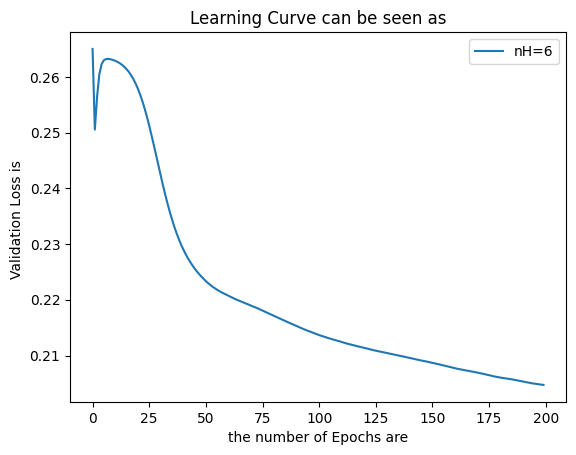


Training with nH = 8
the number of Epochs are 1/200, Validation Loss is: 0.2649
the number of Epochs are 11/200, Validation Loss is: 0.2624
the number of Epochs are 21/200, Validation Loss is: 0.2562
the number of Epochs are 31/200, Validation Loss is: 0.2402
the number of Epochs are 41/200, Validation Loss is: 0.2283
the number of Epochs are 51/200, Validation Loss is: 0.2227
the number of Epochs are 61/200, Validation Loss is: 0.2196
the number of Epochs are 71/200, Validation Loss is: 0.2179
the number of Epochs are 81/200, Validation Loss is: 0.2171
the number of Epochs are 91/200, Validation Loss is: 0.2166
the number of Epochs are 101/200, Validation Loss is: 0.2162
the number of Epochs are 111/200, Validation Loss is: 0.2158
the number of Epochs are 121/200, Validation Loss is: 0.2156
the number of Epochs are 131/200, Validation Loss is: 0.2154
the number of Epochs are 141/200, Validation Loss is: 0.2152
the number of Epochs are 151/200, Validation Loss is: 0.2148
the number of

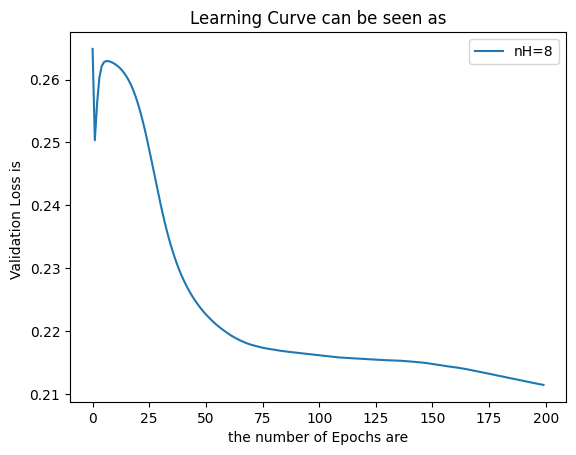


Training with nH = 10
the number of Epochs are 1/200, Validation Loss is: 0.2650
the number of Epochs are 11/200, Validation Loss is: 0.2627
the number of Epochs are 21/200, Validation Loss is: 0.2570
the number of Epochs are 31/200, Validation Loss is: 0.2407
the number of Epochs are 41/200, Validation Loss is: 0.2274
the number of Epochs are 51/200, Validation Loss is: 0.2212
the number of Epochs are 61/200, Validation Loss is: 0.2178
the number of Epochs are 71/200, Validation Loss is: 0.2156
the number of Epochs are 81/200, Validation Loss is: 0.2142
the number of Epochs are 91/200, Validation Loss is: 0.2131
the number of Epochs are 101/200, Validation Loss is: 0.2122
the number of Epochs are 111/200, Validation Loss is: 0.2114
the number of Epochs are 121/200, Validation Loss is: 0.2107
the number of Epochs are 131/200, Validation Loss is: 0.2099
the number of Epochs are 141/200, Validation Loss is: 0.2090
the number of Epochs are 151/200, Validation Loss is: 0.2082
the number o

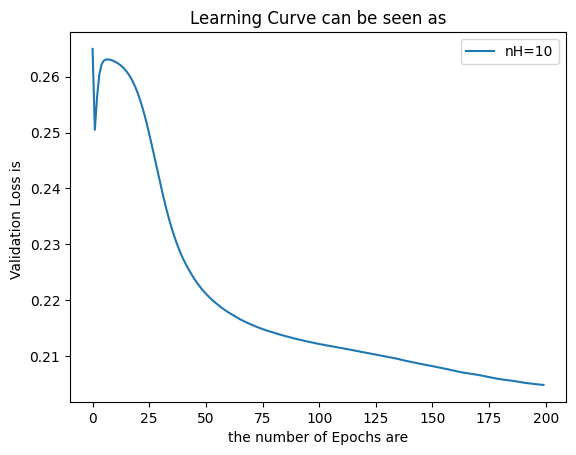

In [15]:

def initialize_parameters(input_size, nH, output_size=1):  # Output size = 1 for binary classification
    return {
        "W1": np.random.randn(input_size, nH) * 0.01,
        "b1": np.zeros((1, nH)),
        "W2": np.random.randn(nH, output_size) * 0.01,
        "b2": np.zeros((1, output_size)),
    }

def forward_propagation(X, parameters):
    Z1 = np.dot(X, parameters["W1"]) + parameters["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters["W2"]) + parameters["b2"]
    return Z2, {"A1": A1, "Z1": Z1, "Z2": Z2}  

def backward_propagation(X, Y, cache, parameters):
    m = X.shape[0]
    A1 = cache["A1"]

    dZ2 = mse_loss_derivative(Y, cache["Z2"]) / m
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, parameters["W2"].T)
    dZ1 = dA1 * relu_derivative(cache["Z1"])
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(parameters, gradients, learning_rate):
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients["d" + key]
    return parameters

def train_mlp(X_train, Y_train, X_val, Y_val, nH, epochs, learning_rate, batch_size):
    parameters = initialize_parameters(X_train.shape[1], nH, 1)  # Binary classification
    val_loss_history = []

    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_batch, Y_batch = X_train[i:i + batch_size], Y_train[i:i + batch_size]
            Y_pred, cache = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(X_batch, Y_batch, cache, parameters)
            parameters = update_parameters(parameters, gradients, learning_rate)

        val_loss = mse_loss(Y_val, forward_propagation(X_val, parameters)[0])
        val_loss_history.append(val_loss)

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"the number of Epochs are {epoch + 1}/{epochs}, Validation Loss is: {val_loss:.4f}")

    return parameters, val_loss_history

def test_mlp(X_test, parameters):
    Y_pred, _ = forward_propagation(X_test, parameters)
    return Y_pred

def plot_learning_curves(val_loss_history, nH):
    plt.plot(val_loss_history, label=f"nH={nH}")
    plt.xlabel("the number of Epochs are")
    plt.ylabel("Validation Loss is ")
    plt.legend()
    plt.title("Learning Curve can be seen as")
    plt.show()

if __name__ == "__main__":
    train_class0 = sio.loadmat('train_class0.mat')['x']
    train_class1 = sio.loadmat('train_class1.mat')['x']
    test_class0 = sio.loadmat('test_class0.mat')['x']
    test_class1 = sio.loadmat('test_class1.mat')['x']

    X_train = np.vstack((train_class0[:1500], train_class1[:1500]))
    Y_train = np.vstack((np.zeros((1500, 1)), np.ones((1500, 1))))
    X_val = np.vstack((train_class0[1500:], train_class1[1500:]))
    Y_val = np.vstack((np.zeros((500, 1)), np.ones((500, 1))))
    X_test = np.vstack((test_class0, test_class1))
    Y_test = np.vstack((np.zeros((1000, 1)), np.ones((1000, 1))))

    mean, std = X_train.mean(axis=0), X_train.std(axis=0)
    X_train_norm = (X_train - mean) / std
    X_val_norm = (X_val - mean) / std
    X_test_norm = (X_test - mean) / std

    hidden_nodes = [2, 4, 6, 8, 10]
    epochs, learning_rate, batch_size = 200, 0.01, 32

    for nH in hidden_nodes:
        print(f"\nTraining with nH = {nH}")
        best_params, val_loss_hist = train_mlp(X_train_norm, Y_train, X_val_norm, Y_val, nH, epochs, learning_rate, batch_size)
        Y_test_pred = test_mlp(X_test_norm, best_params)
        test_loss = mse_loss(Y_test, Y_test_pred)
        print(f"nH={nH}, Test Loss: {test_loss:.4f}")
        plot_learning_curves(val_loss_hist, nH)


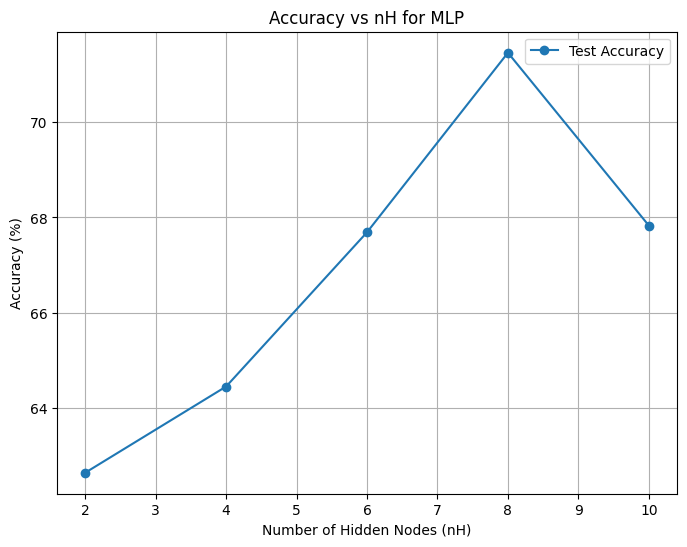

In [19]:
def plot_accuracy_vs_nH(nH_values, accuracies):
    plt.figure(figsize=(8, 6))
    plt.plot(nH_values, accuracies, marker="o", label="Test Accuracy")
    plt.xlabel("Number of Hidden Nodes (nH)")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy vs nH for MLP")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_accuracy_vs_nH(hidden_nodes, average_accuracies)



Training with nH = 2
the number of Epochs are 1/200, Training Loss is: 0.3273, Validation Loss: 0.2651, Test Loss: 0.2651
the number of Epochs are 11/200, Training Loss is: 0.2479, Validation Loss: 0.2637, Test Loss: 0.2637
the number of Epochs are 21/200, Training Loss is: 0.2477, Validation Loss: 0.2635, Test Loss: 0.2635
the number of Epochs are 31/200, Training Loss is: 0.2466, Validation Loss: 0.2624, Test Loss: 0.2623
the number of Epochs are 41/200, Training Loss is: 0.2410, Validation Loss: 0.2565, Test Loss: 0.2561
the number of Epochs are 51/200, Training Loss is: 0.2270, Validation Loss: 0.2428, Test Loss: 0.2412
the number of Epochs are 61/200, Training Loss is: 0.2177, Validation Loss: 0.2349, Test Loss: 0.2322
the number of Epochs are 71/200, Training Loss is: 0.2132, Validation Loss: 0.2324, Test Loss: 0.2290
the number of Epochs are 81/200, Training Loss is: 0.2096, Validation Loss: 0.2319, Test Loss: 0.2276
the number of Epochs are 91/200, Training Loss is: 0.2065, Va

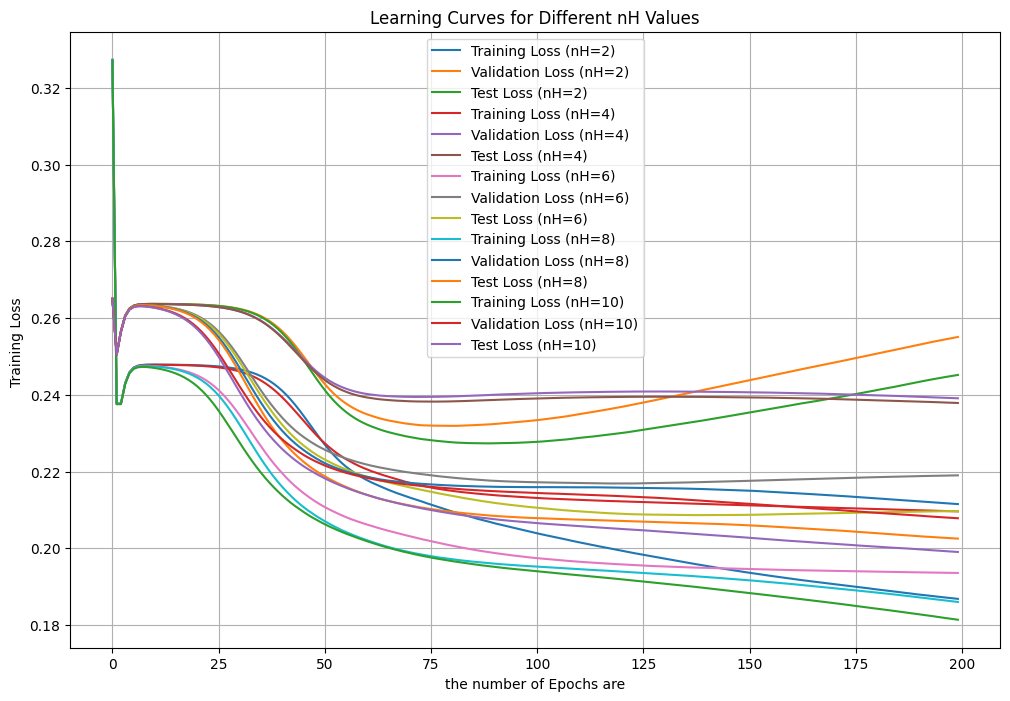

In [16]:
def train_mlp_with_tracking(X_train, Y_train, X_val, Y_val, X_test, Y_test, nH, epochs, learning_rate, batch_size):
    parameters = initialize_parameters(X_train.shape[1], nH, 1)  
    training_loss_history = []
    validation_loss_history = []
    test_loss_history = []

    for epoch in range(epochs):
        epoch_training_loss = 0
        num_batches = 0
        for i in range(0, X_train.shape[0], batch_size):
            X_batch, Y_batch = X_train[i:i + batch_size], Y_train[i:i + batch_size]
            Y_pred, cache = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(X_batch, Y_batch, cache, parameters)
            parameters = update_parameters(parameters, gradients, learning_rate)

            epoch_training_loss += mse_loss(Y_batch, Y_pred)
            num_batches += 1

        training_loss_history.append(epoch_training_loss / num_batches)

        val_loss = mse_loss(Y_val, forward_propagation(X_val, parameters)[0])
        validation_loss_history.append(val_loss)

        test_loss = mse_loss(Y_test, forward_propagation(X_test, parameters)[0])
        test_loss_history.append(test_loss)

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"the number of Epochs are {epoch + 1}/{epochs}, Training Loss is: {training_loss_history[-1]:.4f}, Validation Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}")

    return parameters, training_loss_history, validation_loss_history, test_loss_history

def plot_learning_curves(training_losses, validation_losses, test_losses, nH_values):
    plt.figure(figsize=(12, 8))
    for i, nH in enumerate(nH_values):
        plt.plot(training_losses[i], label=f"Training Loss (nH={nH})")
        plt.plot(validation_losses[i], label=f"Validation Loss (nH={nH})")
        plt.plot(test_losses[i], label=f"Test Loss (nH={nH})")
    plt.xlabel("the number of Epochs are")
    plt.ylabel("Training Loss ")
    plt.title("Learning Curves for Different nH Values")
    plt.legend()
    plt.grid(True)
    plt.show()

hidden_nodes = [2, 4, 6, 8, 10]
epochs, learning_rate, batch_size = 200, 0.01, 32

all_training_losses = []
all_validation_losses = []
all_test_losses = []

for nH in hidden_nodes:
    print(f"\nTraining with nH = {nH}")
    best_params, training_loss, validation_loss, test_loss = train_mlp_with_tracking(
        X_train_norm, Y_train, X_val_norm, Y_val, X_test_norm, Y_test, nH, epochs, learning_rate, batch_size
    )
    all_training_losses.append(training_loss)
    all_validation_losses.append(validation_loss)
    all_test_losses.append(test_loss)

plot_learning_curves(all_training_losses, all_validation_losses, all_test_losses, hidden_nodes)


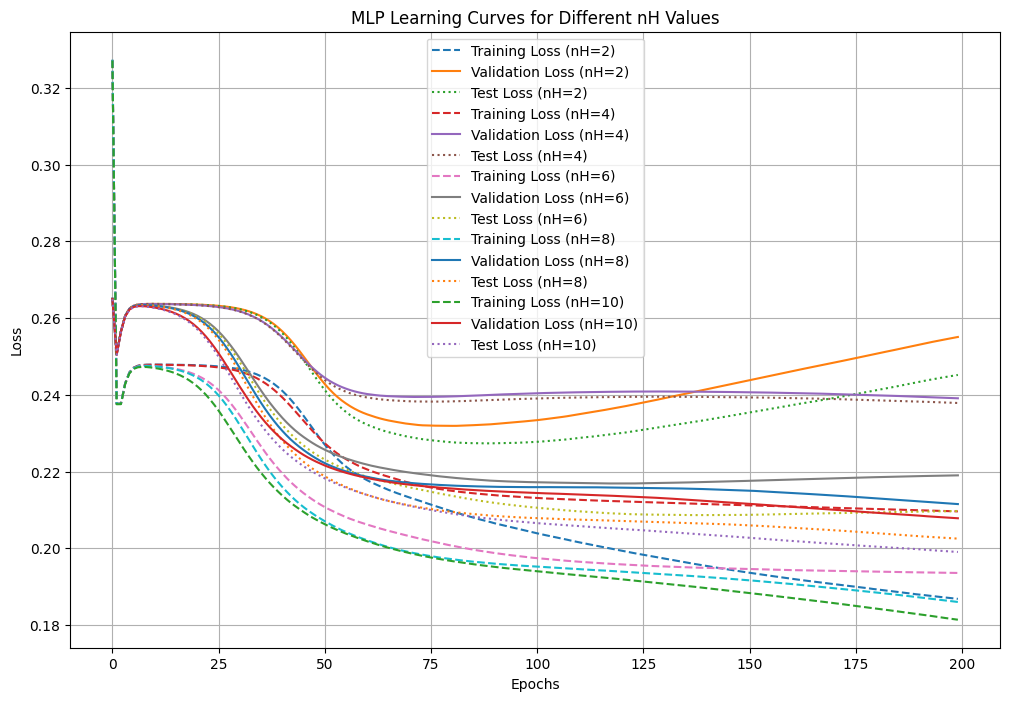

In [18]:
import matplotlib.pyplot as plt

def plot_mlp_learning_curves(training_losses, validation_losses, test_losses, nH_values):
    plt.figure(figsize=(12, 8))
    for i, nH in enumerate(nH_values):
        plt.plot(training_losses[i], label=f"Training Loss (nH={nH})", linestyle="--")
        plt.plot(validation_losses[i], label=f"Validation Loss (nH={nH})")
        plt.plot(test_losses[i], label=f"Test Loss (nH={nH})", linestyle=":")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("MLP Learning Curves for Different nH Values")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_mlp_learning_curves(all_training_losses, all_validation_losses, all_test_losses, hidden_nodes)


In [17]:
def calculate_accuracy(Y_true, Y_pred):
    Y_pred_classes = (Y_pred >= 0.5).astype(int) 
    return np.mean(Y_pred_classes == Y_true) * 100  

# Run multiple initializations and find the best nH
nH_values = [2, 4, 6, 8, 10]
epochs, learning_rate, batch_size = 200, 0.01, 32
num_initializations = 5  

average_accuracies = []

for nH in nH_values:
    test_accuracies = []
    print(f"\nTraining with nH = {nH} for {num_initializations} initializations")
    
    for init in range(num_initializations):
        print(f"  Initialization {init + 1}/{num_initializations}")
        params, training_loss, validation_loss, test_loss = train_mlp_with_tracking(
            X_train_norm, Y_train, X_val_norm, Y_val, X_test_norm, Y_test, nH, epochs, learning_rate, batch_size
        )
        Y_test_pred = test_mlp(X_test_norm, params)
        accuracy = calculate_accuracy(Y_test, Y_test_pred)
        test_accuracies.append(accuracy)
        print(f"    Test Accuracy: {accuracy:.2f}%")

    avg_accuracy = np.mean(test_accuracies)
    average_accuracies.append(avg_accuracy)
    print(f"Average Test Accuracy for nH = {nH}: {avg_accuracy:.2f}%")


best_nH_index = np.argmax(average_accuracies)
best_nH = nH_values[best_nH_index]
print(f"\nBest nH: {best_nH} with Average Test Accuracy: {average_accuracies[best_nH_index]:.2f}%")



Training with nH = 2 for 5 initializations
  Initialization 1/5
the number of Epochs are 1/200, Training Loss is: 0.3273, Validation Loss: 0.2651, Test Loss: 0.2651
the number of Epochs are 11/200, Training Loss is: 0.2479, Validation Loss: 0.2637, Test Loss: 0.2637
the number of Epochs are 21/200, Training Loss is: 0.2476, Validation Loss: 0.2634, Test Loss: 0.2633
the number of Epochs are 31/200, Training Loss is: 0.2458, Validation Loss: 0.2615, Test Loss: 0.2613
the number of Epochs are 41/200, Training Loss is: 0.2388, Validation Loss: 0.2542, Test Loss: 0.2531
the number of Epochs are 51/200, Training Loss is: 0.2292, Validation Loss: 0.2437, Test Loss: 0.2419
the number of Epochs are 61/200, Training Loss is: 0.2170, Validation Loss: 0.2310, Test Loss: 0.2284
the number of Epochs are 71/200, Training Loss is: 0.2083, Validation Loss: 0.2227, Test Loss: 0.2187
the number of Epochs are 81/200, Training Loss is: 0.2034, Validation Loss: 0.2185, Test Loss: 0.2132
the number of Epoc

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Dropout,
    BatchNormalization,
    Flatten,
    Dense,
)
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def create_cnn_model(kernel_size=3, batch_norm=True, dropout_rates=(0.2, 0.3, 0.4)):
    model = Sequential()

    model.add(Conv2D(32, (kernel_size, kernel_size), activation="relu", padding="same", input_shape=(32, 32, 3)))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Conv2D(32, (kernel_size, kernel_size), activation="relu", padding="same"))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rates[0]))

    model.add(Conv2D(64, (kernel_size, kernel_size), activation="relu", padding="same"))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Conv2D(64, (kernel_size, kernel_size), activation="relu", padding="same"))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rates[1]))

    model.add(Conv2D(128, (kernel_size, kernel_size), activation="relu", padding="same"))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Conv2D(128, (kernel_size, kernel_size), activation="relu", padding="same"))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rates[2]))

    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))

    return model

def train_and_evaluate_model(learning_rate=0.001, kernel_size=3, batch_norm=True, dropout_rates=(0.2, 0.3, 0.4), batch_size=64, epochs=10):
    model = create_cnn_model(kernel_size, batch_norm, dropout_rates)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return test_accuracy, history

print("Training with default settings...")
default_accuracy, default_history = train_and_evaluate_model()

print("Experimenting with learning rates...")
lr_accuracies = {}
for lr in [0.05, 0.0001]:
    print(f"Training with learning rate = {lr}...")
    acc, _ = train_and_evaluate_model(learning_rate=lr)
    lr_accuracies[lr] = acc

print("Experimenting with kernel size...")
kernel_accuracies = {}
for kernel_size in [3, 7]:
    print(f"Training with kernel size = {kernel_size}...")
    acc, _ = train_and_evaluate_model(kernel_size=kernel_size)
    kernel_accuracies[kernel_size] = acc

print("Experimenting without batch normalization...")
no_bn_accuracy, _ = train_and_evaluate_model(batch_norm=False)

print("Experimenting with batch sizes...")
batch_size_accuracies = {}
for batch_size in [16, 256]:
    print(f"Training with batch size = {batch_size}...")
    acc, _ = train_and_evaluate_model(batch_size=batch_size)
    batch_size_accuracies[batch_size] = acc

print("\nDefault Accuracy:", default_accuracy)
print("\nLearning Rate Accuracies:", lr_accuracies)
print("\nKernel Size Accuracies:", kernel_accuracies)
print("\nAccuracy without Batch Normalization:", no_bn_accuracy)
print("\nBatch Size Accuracies:", batch_size_accuracies)


Training with default settings...


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 78ms/step - accuracy: 0.3821 - loss: 2.1897 - val_accuracy: 0.5623 - val_loss: 1.2762
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.6182 - loss: 1.1304 - val_accuracy: 0.6878 - val_loss: 0.8968
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.6989 - loss: 0.8654 - val_accuracy: 0.7325 - val_loss: 0.7699
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.7343 - loss: 0.7538 - val_accuracy: 0.7428 - val_loss: 0.7503
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.7697 - loss: 0.6615 - val_accuracy: 0.7441 - val_loss: 0.7520
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.7909 - loss: 0.5968 - val_accuracy: 0.7966 - val_loss: 0.5945
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.8067 - loss: 0.5511 - val_accuracy: 0.8072 - val_loss: 0.5620
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.8187 - loss: 0.5146 - 